# Smart Ratings for House Listings

### Submitted by:
#### Vivek Bharti (vb1275)
#### Mayank Lamba (ml5711)

##### Motivation
We wanted to be able to recommend areas of improvement for incoming or existing hosts that might help them improve their ratings and eventually attract more customers.

##### Problem Statement
Predict ‘prices’ and ‘ratings’ of the house/room listings using the Airbnb data for New York with the help of various features present in the data (like ‘room type’, ‘neighborhood’, ‘amenities’, etc.).

### Data Preparation

Following are the ways with which we cleaned our data:

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing Airbnb data (containing over 50 features)
bnb_listings = pd.read_excel('bnbListing.xlsx')
bnb_listings.head(10)

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,2758,Steph,2008-09-06,"New York, New York, United States",NaN,NaN,f,Harlem,3.0,...,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,f,f,3,1.42
1,2539,2787,John,2008-09-07,"New York, New York, United States",NaN,NaN,t,Gravesend,8.0,...,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0.23
2,2595,2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,0.8,f,Midtown,5.0,...,9.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,2,0.33
3,3330,4177,Jbee,2008-11-09,"New York, New York, United States",NaN,NaN,f,East Williamsburg,5.0,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,3,0.32
4,3647,4632,Elisabeth,2008-11-25,"New York, New York, United States",within a day,0.5,f,Harlem,1.0,...,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,NaN
5,3831,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,1.0,f,Clinton Hill,1.0,...,10.0,10.0,9.0,9.0,f,moderate,f,f,1,4.36
6,5022,7192,Laura,2009-01-29,"Miami, Florida, United States",within a day,1.0,f,East Harlem,1.0,...,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1,0.09
7,5099,7322,Chris,2009-02-02,"New York, New York, United States",within a day,1.0,f,Flatiron District,1.0,...,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,t,t,1,0.57
8,5121,7356,Garon,2009-02-03,"New York, New York, United States",NaN,NaN,f,Bedford-Stuyvesant,1.0,...,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1,0.45
9,5172,7386,Adrienne,2009-02-03,"New York, New York, United States",NaN,NaN,t,Murray Hill,1.0,...,9.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,t,1,0.71


In [3]:
print('Total number of columns:', len(bnb_listings.columns))

Total number of columns: 55


In [4]:
print('Columns having Nan values:\n', bnb_listings.columns[bnb_listings.isna().any()].tolist())

Columns having Nan values:
 ['host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'city', 'state', 'zipcode', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [5]:
print('Number of columns with NaN values:', len(bnb_listings.columns[bnb_listings.isna().any()].tolist()))

Number of columns with NaN values: 27


In [6]:
bnb_listings['host_since'].describe()

count                   50032
unique                   3335
top       2015-03-30 00:00:00
freq                      148
first     2008-04-21 00:00:00
last      2018-10-02 00:00:00
Name: host_since, dtype: object

In [7]:
# further features that we did not include in our analysis in the wake of relevance
columns_to_drop =['host_location', 'host_name', 'host_neighbourhood', 'street', 'review_scores_accuracy', 
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_location', 'review_scores_value', 'host_verifications', 'smart_location']

In [8]:
# dropping the above mentioned features
bnb_listings.drop(columns_to_drop, inplace=True, axis=1)

#### Taking care of Boolean features:

In [9]:
# listing boolean features
boolean_to_binary = ['require_guest_phone_verification', 'require_guest_profile_picture', 
                     'instant_bookable', 'is_location_exact', 'host_identity_verified', 
                     'host_has_profile_pic', 'host_is_superhost']

In [10]:
# replacing 't' and 'f' with 1 and 0
bnb_listings[boolean_to_binary] = (bnb_listings[boolean_to_binary]).replace({'t':1, 'f':0})

#### Taking care of features with null values:

In [12]:
# listing columns with NaN values that need to be filled with zeros
null_to_zero = ['host_is_superhost', 'host_listings_count', 'host_total_listings_count', 
                'host_has_profile_pic', 'host_identity_verified']

In [13]:
# filling NaN values in selected columns to zero
bnb_listings[null_to_zero] = (bnb_listings[null_to_zero]).fillna(0)

In [14]:
# quality check
(bnb_listings[null_to_zero]).isnull().any()

host_is_superhost            False
host_listings_count          False
host_total_listings_count    False
host_has_profile_pic         False
host_identity_verified       False
dtype: bool

In [15]:
# filling null values in city as New York City
bnb_listings['city'] = bnb_listings['city'].fillna('New York City')

In [16]:
# quality check
bnb_listings['city'].isnull().any()

False

In [17]:
# filling null values in state as NY
bnb_listings['state'] = bnb_listings['state'].fillna('NY')

In [18]:
# quality check
bnb_listings['state'].isnull().any()

False

In [19]:
# filling null values with median of the column
bnb_listings['bathrooms'] = bnb_listings['bathrooms'].fillna(round((bnb_listings['bathrooms']).median()))
bnb_listings['bedrooms'] = bnb_listings['bedrooms'].fillna(round((bnb_listings['bedrooms']).median()))
bnb_listings['beds'] = bnb_listings['beds'].fillna(round((bnb_listings['beds']).median()))
bnb_listings['cleaning_fee'] = bnb_listings['cleaning_fee'].fillna(round((bnb_listings['cleaning_fee']).median()))

In [20]:
# quality check
(bnb_listings[['bathrooms', 'bedrooms', 'beds', 'cleaning_fee']]).isnull().any()

bathrooms       False
bedrooms        False
beds            False
cleaning_fee    False
dtype: bool

In [21]:
# some more null values taken care of
bnb_listings['host_response_time'] = bnb_listings['host_response_time'].fillna('Not Available')

In [22]:
bnb_listings['host_response_rate'] = bnb_listings['host_response_rate'].fillna(bnb_listings['host_response_rate'].mean())

In [23]:
# filling null values for some more columns with median of the column
bnb_listings['security_deposit'] = bnb_listings['security_deposit'].fillna(round((bnb_listings['security_deposit']).median()))

In [24]:
bnb_listings['reviews_per_month'] = bnb_listings['reviews_per_month'].fillna(bnb_listings['reviews_per_month'].median())

In [25]:
# quality check
(bnb_listings[['host_response_time', 'security_deposit']]).isnull().any()

host_response_time    False
security_deposit      False
dtype: bool

#### Segmentation & Handling Date-Time column::

In [26]:
# price buckets for segmenting the 'price' column in bnb_listings (quintiles)
(bnb_listings['price']).quantile([0.20, 0.40, 0.60, 0.80])

0.2     60.0
0.4     90.0
0.6    130.0
0.8    199.0
Name: price, dtype: float64

In [27]:
# adding column in our data for storing sgmented prices
bnb_listings['price_segments'] = 0

In [28]:
# segmenting the 'price' column
bnb_listings.loc[bnb_listings.price<=60, 'price_segments'] = 1
bnb_listings.loc[(bnb_listings.price>60)&(bnb_listings.price<=90), 'price_segments'] = 2
bnb_listings.loc[(bnb_listings.price>90)&(bnb_listings.price<=130), 'price_segments'] = 3
bnb_listings.loc[(bnb_listings.price>130)&(bnb_listings.price<=199), 'price_segments'] = 4
bnb_listings.loc[bnb_listings.price>199, 'price_segments'] = 5

In [29]:
# quality check
bnb_listings.loc[(bnb_listings.price>60)&(bnb_listings.price<=90), 'price_segments'].unique()

array([2])

In [30]:
# taking the values for only the 'year'
bnb_listings['host_since'] = pd.DatetimeIndex(bnb_listings['host_since']).year

In [31]:
# year buckets for segmentation
bnb_listings['host_since'].quantile([0.20, 0.40, 0.60, 0.80])

0.2    2013.0
0.4    2014.0
0.6    2015.0
0.8    2016.0
Name: host_since, dtype: float64

In [32]:
bnb_listings['date_segments'] = 0

In [33]:
# segmenting the 'host_since' column
bnb_listings.loc[bnb_listings.host_since<=2013, 'date_segments'] = 1
bnb_listings.loc[(bnb_listings.host_since>2013)&(bnb_listings.host_since<=2014), 'date_segments'] = 2
bnb_listings.loc[(bnb_listings.host_since>2014)&(bnb_listings.host_since<=2015), 'date_segments'] = 3
bnb_listings.loc[(bnb_listings.host_since>2015)&(bnb_listings.host_since<=2016), 'date_segments'] = 4
bnb_listings.loc[bnb_listings.host_since>2016, 'date_segments'] = 5

In [34]:
# quality check
bnb_listings.loc[(bnb_listings.host_since>2015)&(bnb_listings.host_since<=2016), 'date_segments'].unique()

array([4])

#### String value conversion:

In [35]:
# converting the 'amenities' column to project the count of amenities
bnb_listings['amenities'] = bnb_listings['amenities'].map(lambda x:len(x.strip('{}').split(',')))

In [36]:
# quality check
bnb_listings['amenities'].dtype

dtype('int64')

In [37]:
# encoding labels for string valued columns that contain categories
columns = ['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 
           'room_type', 'bed_type', 'cancellation_policy']


def convert(data, columns):
    for i in columns:
        unique_categories = sorted(data[i].unique())
        new_dict = {v:k for k, v in dict(enumerate(unique_categories)).items()}
        data[i] = data[i].map(lambda x:new_dict[x])
    
    return data


bnb_listings = convert(bnb_listings, columns)

In [38]:
# quality check
bnb_listings[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50041 entries, 0 to 50040
Data columns (total 7 columns):
host_response_time              50041 non-null int64
neighbourhood_cleansed          50041 non-null int64
neighbourhood_group_cleansed    50041 non-null int64
property_type                   50041 non-null int64
room_type                       50041 non-null int64
bed_type                        50041 non-null int64
cancellation_policy             50041 non-null int64
dtypes: int64(7)
memory usage: 2.7 MB


In [39]:
# checking the prepared data
bnb_listings

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_segments,date_segments
0,2515,2758,2008.0,0,0.927527,0.0,3.0,3.0,1.0,1.0,...,173,93.0,0,4,0,0,3,1.42,1,1
1,2539,2787,2008.0,0,0.927527,1.0,8.0,8.0,1.0,1.0,...,8,98.0,0,2,0,0,8,0.23,4,1
2,2595,2845,2008.0,2,0.800000,0.0,5.0,5.0,1.0,1.0,...,36,94.0,0,4,1,1,2,0.33,5,1
3,3330,4177,2008.0,0,0.927527,0.0,5.0,5.0,1.0,1.0,...,34,97.0,0,4,0,0,3,0.32,2,1
4,3647,4632,2008.0,2,0.500000,0.0,1.0,1.0,1.0,1.0,...,0,NaN,0,4,1,1,1,0.75,4,1
5,3831,4869,2008.0,4,1.000000,0.0,1.0,1.0,1.0,1.0,...,213,91.0,0,2,0,0,1,4.36,2,1
6,5022,7192,2009.0,2,1.000000,0.0,1.0,1.0,1.0,1.0,...,7,94.0,0,4,1,1,1,0.09,2,1
7,5099,7322,2009.0,2,1.000000,0.0,1.0,1.0,1.0,0.0,...,66,87.0,0,4,1,1,1,0.57,4,1
8,5121,7356,2009.0,0,0.927527,0.0,1.0,1.0,1.0,0.0,...,51,90.0,0,4,0,0,1,0.45,1,1
9,5172,7386,2009.0,0,0.927527,1.0,1.0,1.0,1.0,1.0,...,82,94.0,0,4,0,1,1,0.71,3,1


In [40]:
bnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50041 entries, 0 to 50040
Data columns (total 45 columns):
id                                  50041 non-null int64
host_id                             50041 non-null int64
host_since                          50032 non-null float64
host_response_time                  50041 non-null int64
host_response_rate                  50041 non-null float64
host_is_superhost                   50041 non-null float64
host_listings_count                 50041 non-null float64
host_total_listings_count           50041 non-null float64
host_has_profile_pic                50041 non-null float64
host_identity_verified              50041 non-null float64
neighbourhood_cleansed              50041 non-null int64
neighbourhood_group_cleansed        50041 non-null int64
city                                50041 non-null object
state                               50041 non-null object
zipcode                             49305 non-null object
country_code       

<b>Note:</b> The original data that we got from insideairbnb.com was about 183mb in size with about 96 features. In this notebook, we are working on the data that we got after removing the completely irrelevant features (like thumbnail link, image link, etc.) from the raw dataset which we have provided in the folder: './ml5711_vb1275_CodeSubmission/Raw_data/' for reference.

## Price Prediction

Now we are going to import the perpared data and apply different models to it in order to predict 'price_segments'.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# checking data
bnb_listings.head(10)

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_segments,date_segments
0,2515,2758,2008.0,0,0.927527,0.0,3.0,3.0,1.0,1.0,...,173,93.0,0,4,0,0,3,1.42,1,1
1,2539,2787,2008.0,0,0.927527,1.0,8.0,8.0,1.0,1.0,...,8,98.0,0,2,0,0,8,0.23,4,1
2,2595,2845,2008.0,2,0.800000,0.0,5.0,5.0,1.0,1.0,...,36,94.0,0,4,1,1,2,0.33,5,1
3,3330,4177,2008.0,0,0.927527,0.0,5.0,5.0,1.0,1.0,...,34,97.0,0,4,0,0,3,0.32,2,1
4,3647,4632,2008.0,2,0.500000,0.0,1.0,1.0,1.0,1.0,...,0,NaN,0,4,1,1,1,0.75,4,1
5,3831,4869,2008.0,4,1.000000,0.0,1.0,1.0,1.0,1.0,...,213,91.0,0,2,0,0,1,4.36,2,1
6,5022,7192,2009.0,2,1.000000,0.0,1.0,1.0,1.0,1.0,...,7,94.0,0,4,1,1,1,0.09,2,1
7,5099,7322,2009.0,2,1.000000,0.0,1.0,1.0,1.0,0.0,...,66,87.0,0,4,1,1,1,0.57,4,1
8,5121,7356,2009.0,0,0.927527,0.0,1.0,1.0,1.0,0.0,...,51,90.0,0,4,0,0,1,0.45,1,1
9,5172,7386,2009.0,0,0.927527,1.0,1.0,1.0,1.0,1.0,...,82,94.0,0,4,0,1,1,0.71,3,1


In [43]:
print('Number of data points in our data:', len(bnb_listings))

Number of data points in our data: 50041


## Random Forrest

Seeing as we have imported our perpared data that is now ready for analysis, we first try out <b>Random Forrest</b>, which as we know is one of the better tree algorithm for working on categorical data.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# splitting the data into training and test split
train_rf, test_rf = train_test_split(bnb_listings, train_size=0.8, test_size=0.2, random_state=42)

Now we will remove some columns that are not required for training/testing of the model.

In [ ]:
# items not required in the dataset
items_remove = ['price', 'review_scores_rating', 'id', 'host_id', 'latitude', 'longitude', 
                'price_segments', 'host_since', 'city', 'state', 'country_code', 'zipcode']
target_train = train_rf['price_segments']
target_test = test_rf['price_segments']
train_rf.drop(items_remove, inplace=True, axis=1)
test_rf.drop(items_remove, inplace=True, axis=1)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# creating and fitting random forrest
random_forest_bnb = RandomForestClassifier(n_estimators=1000)
random_forest_bnb.fit(train_rf, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
# make predictions
predictions = random_forest_bnb.predict(test_rf)

In [50]:
# Calculate the absolute errors
errors = abs(predictions - target_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.55 degrees.


In [51]:
from sklearn.metrics import accuracy_score

# Evaluation

# for train data
train_predictions = random_forest_bnb.predict(train_rf)

train_accuracy = accuracy_score(target_train, train_predictions)

print("The train accuracy is:",train_accuracy*100,"%")

# for test data
test_predictions = random_forest_bnb.predict(test_rf)

test_accuracy = accuracy_score(target_test, test_predictions)

print("The test accuracy is:",test_accuracy*100,"%")

The train accuracy is: 99.97751798561151 %
The test accuracy is: 56.1294834648816 %


As you can see, the accuracy of the model is low. This can be attributed to the fact that we have 5 segments for price. We should try to reduce it and try running our model again.

#### Now, we'll find the accuracy by taking only 3 price segments instead of 5

In [52]:
# creating a copy in order to distinguish
bnb_listings_2 = bnb_listings.copy()

In [53]:
# choosing percentiles to split on
bnb_listings_2['price'].quantile([0.33, 0.67])

0.33     80.0
0.67    150.0
Name: price, dtype: float64

In [54]:
# creating the new price segments
bnb_listings_2['price_segments'] = 0

bnb_listings_2.loc[bnb_listings_2.price<=80, 'price_segments'] = 1
bnb_listings_2.loc[(bnb_listings_2.price>80)&(bnb_listings_2.price<=150), 'price_segments'] = 2
bnb_listings_2.loc[bnb_listings_2.price>150, 'price_segments'] = 3

# quality check
bnb_listings_2['price_segments'].unique()

array([1, 2, 3])

In [55]:
# for data with 3 price segments
train_rf_2, test_rf_2 = train_test_split(bnb_listings_2, train_size=0.8, test_size=0.2, random_state=42)

target_train_2 = train_rf_2['price_segments']
target_test_2 = test_rf_2['price_segments']
train_rf_2.drop(items_remove, inplace=True, axis=1)
test_rf_2.drop(items_remove, inplace=True, axis=1)

random_forest_bnb_2 = RandomForestClassifier(n_estimators=1000)
random_forest_bnb_2.fit(train_rf_2, target_train_2)

predictions_2 = random_forest_bnb_2.predict(test_rf_2)

# Evaluation
print('For data with 3 price segments:')

errors_2 = abs(predictions_2 - target_test_2)
print('Mean Absolute Error:', round(np.mean(errors_2), 2), 'degrees.')

# for train data
train_predictions_2 = random_forest_bnb_2.predict(train_rf_2)

train_accuracy_2 = accuracy_score(target_train_2, train_predictions_2)

print("The train accuracy is:",train_accuracy_2*100,"%")

# for test data
test_predictions_2 = random_forest_bnb_2.predict(test_rf_2)

test_accuracy_2 = accuracy_score(target_test_2, test_predictions_2)

print("The test accuracy is:",test_accuracy_2*100,"%")

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


For data with 3 price segments:
Mean Absolute Error: 0.28 degrees.
The train accuracy is: 99.98001598721024 %
The test accuracy is: 72.95434109301628 %


As we can see now, the accuracy has substantially increased. Now lets look at the feature importance of the features that we have in order to get a better sense of our data.

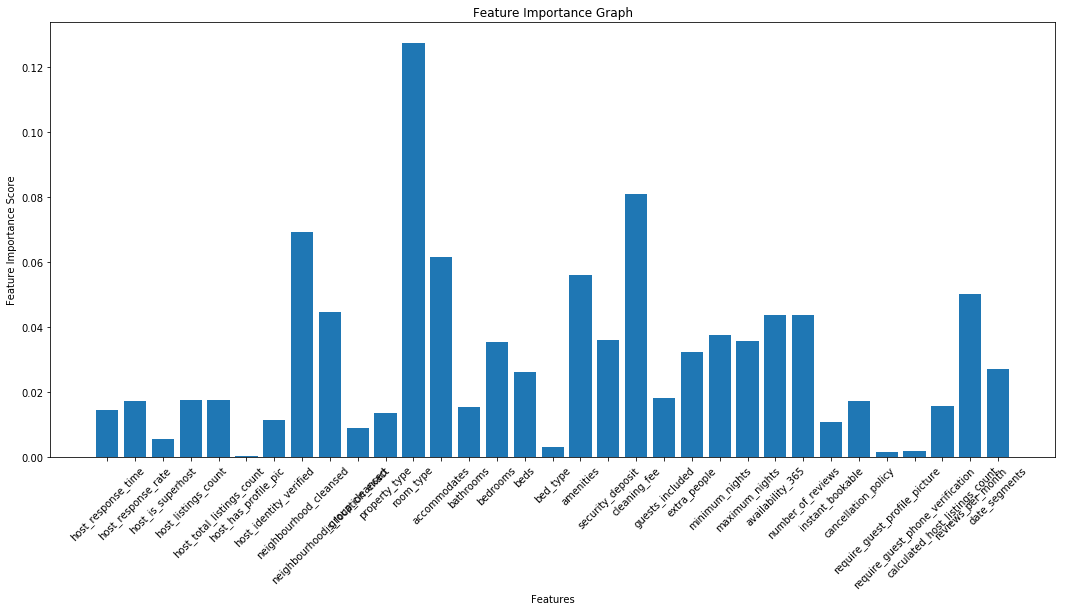

In [56]:
# Feature importances
features = list(train_rf_2)
feature_importances = random_forest_bnb_2.feature_importances_

plt.figure(figsize=(18, 8))
plt.bar(features, feature_importances)
plt.xticks(features, rotation=45)
plt.title('Feature Importance Graph')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.show()

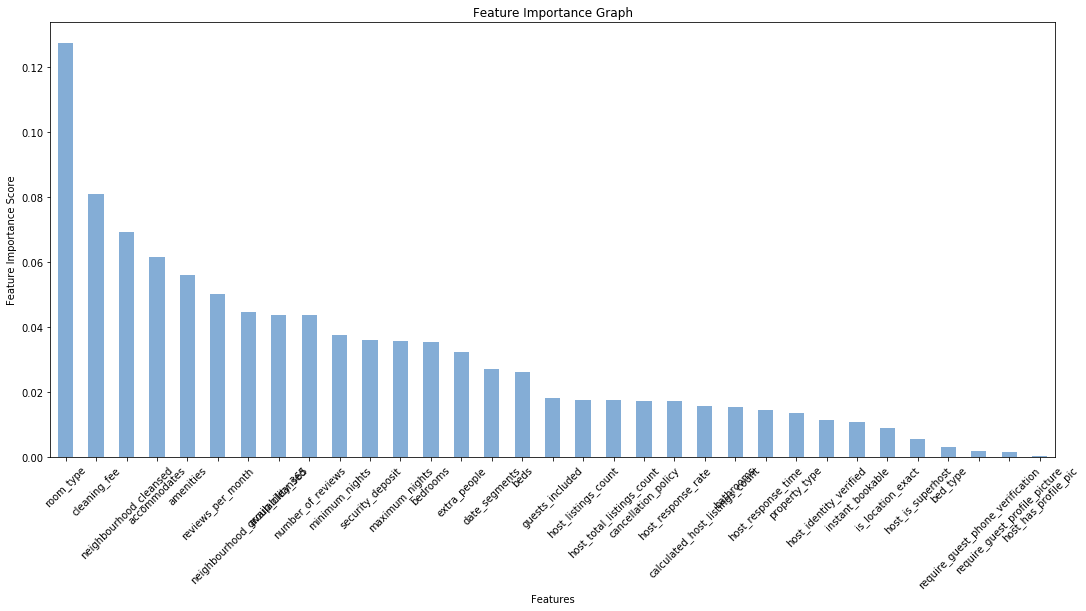

In [57]:
# sorting the feature importances for a better view
sorted_features = pd.Series(feature_importances, features).sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sorted_features.plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Graph')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.show()

We will now move forward with only those features that are actually important to our analysis.

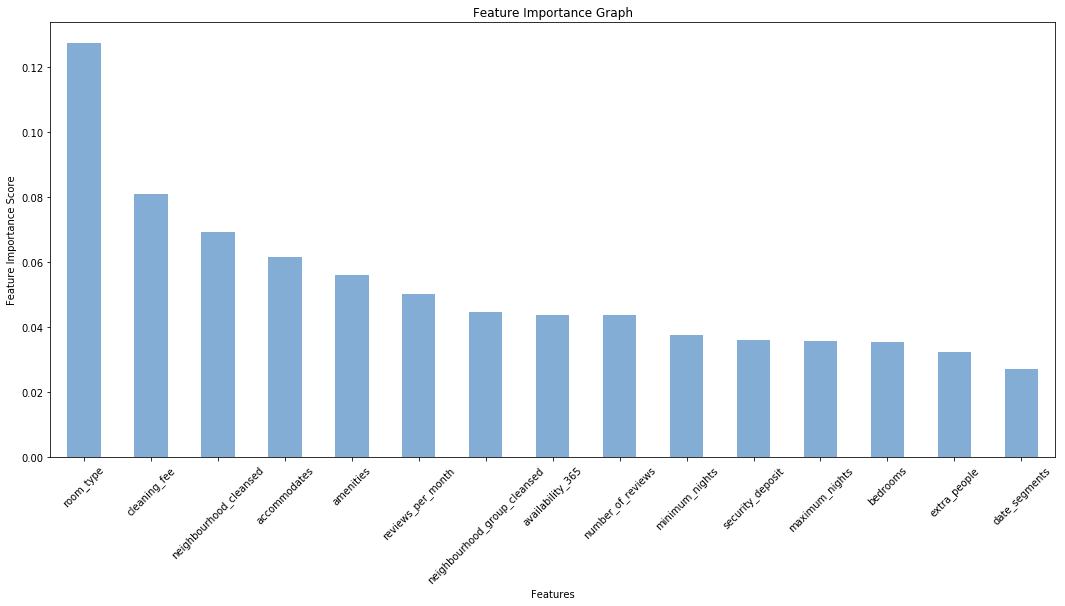

In [58]:
# taking top 15 features
sorted_features = sorted_features.head(15)
plt.figure(figsize=(18, 8))
sorted_features.plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Feature Importance Graph')
plt.show()

<b>Note: </b>It is important to note that, for incoming users, the values for the features 'reviews_per_month' and 'number_of_reviews' will be <b>0</b>. As these features are ranked 6th and 9th respectively, they won't have as much of an impact as the others.

The following cells create a correlation matrix that will help us understand how our features interact with each other:

In [59]:
import seaborn as sns

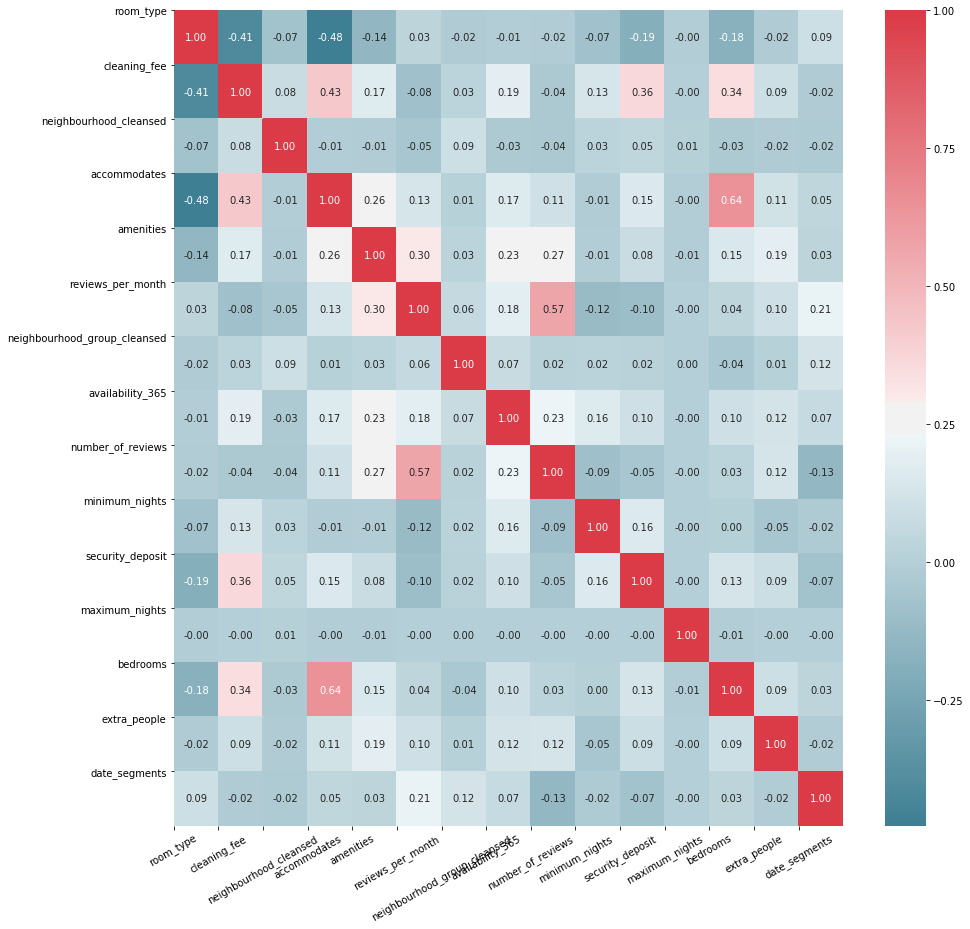

In [60]:
#Create Correlation df
corr = bnb_listings_2[list(sorted_features.index)].corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 15))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=30);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

We see that the correlation among features is not that significant.

Let us apply our model to only these 15 features.

In [61]:
# Taking only relevant features (15 as mentioned above)
train_rf, test_rf = train_test_split(bnb_listings_2, train_size=0.8, test_size=0.2, random_state=42)

target_train_rf = train_rf['price_segments']
target_test_rf = test_rf['price_segments']

train_rf = train_rf[list(sorted_features.index)]
test_rf = test_rf[list(sorted_features.index)]

random_forest_bnb = RandomForestClassifier(n_estimators=1000)
random_forest_bnb.fit(train_rf, target_train_rf)

predictions_rf = random_forest_bnb.predict(test_rf)

# Evaluation

errors = abs(predictions_rf - target_test_rf)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# for train data
train_predictions_rf = random_forest_bnb.predict(train_rf)

train_accuracy_rf = accuracy_score(target_train_rf, train_predictions_rf)

print("The train accuracy is:",train_accuracy_rf*100,"%")

# for test data
test_predictions_rf = random_forest_bnb.predict(test_rf)

test_accuracy_rf = accuracy_score(target_test_rf, test_predictions_rf)

print("The test accuracy is:",test_accuracy_rf*100,"%")

Mean Absolute Error: 0.29 degrees.
The train accuracy is: 99.92256195043964 %
The test accuracy is: 72.35488060745328 %


## XGBoost

Now lets look at another model used for classification in hopes of improving accuracy score. The model that we will look at now is <b>XGBoost</b>.

In [62]:
from xgboost import XGBClassifier

In [63]:
# Building an XGboost model
train_xgb, test_xgb = train_test_split(bnb_listings_2, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
# preparing the train and test datasets
target_train_xgb = train_xgb['price_segments']
target_test_xgb = test_xgb['price_segments']
train_xgb.drop(items_remove, inplace=True, axis=1)
test_xgb.drop(items_remove, inplace=True, axis=1)

In [65]:
# creating & fitting the model
xgboost_bnb = XGBClassifier(n_estimators=1000)
xgboost_bnb.fit(train_xgb, target_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [66]:
# getting predictions on test data
predictions_xgb = xgboost_bnb.predict(test_xgb)

In [67]:
errors_xgb = abs(predictions_xgb - target_test_xgb)
print('Mean Absolute Error:', round(np.mean(errors_xgb), 2), 'degrees.')

Mean Absolute Error: 0.26 degrees.


In [68]:
# Evaluation 

# for train data
train_predictions_xgb = xgboost_bnb.predict(train_xgb)

train_accuracy_xgb = accuracy_score(target_train_xgb, train_predictions_xgb)

print("The train accuracy is:",train_accuracy_xgb*100,"%")

# for test data
test_predictions_xgb = xgboost_bnb.predict(test_xgb)

test_accuracy_xgb = accuracy_score(target_test_xgb, test_predictions_xgb)

print("The test accuracy is:",test_accuracy_xgb*100,"%")

The train accuracy is: 78.8744004796163 %
The test accuracy is: 74.4729743231092 %


Now, let us only take the top 15 features.

In [69]:
# Taking only relevant variables (15 features as shown above)
train_xgb, test_xgb = train_test_split(bnb_listings_2, train_size=0.8, test_size=0.2, random_state=42)

target_train_xgb = train_xgb['price_segments']
target_test_xgb = test_xgb['price_segments']

train_xgb = train_xgb[list(sorted_features.index)]
test_xgb = test_xgb[list(sorted_features.index)]

xgboost_bnb = XGBClassifier(n_estimators=1000)
xgboost_bnb.fit(train_xgb, target_train_xgb)

predictions_xgb = xgboost_bnb.predict(test_xgb)

# Evaluation

errors = abs(predictions_xgb - target_test_xgb)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# for train data
train_predictions_xgb = xgboost_bnb.predict(train_xgb)

train_accuracy_xgb = accuracy_score(target_train_xgb, train_predictions_xgb)

print("The train accuracy is:",train_accuracy_xgb*100,"%")

# for test data
test_predictions_xgb = xgboost_bnb.predict(test_xgb)

test_accuracy_xgb_15 = accuracy_score(target_test_xgb, test_predictions_xgb)

print("The test accuracy is:",test_accuracy_xgb_15*100,"%")

Mean Absolute Error: 0.27 degrees.
The train accuracy is: 78.09002797761791 %
The test accuracy is: 73.59376561095014 %


### XGBoost performed better!
This is expected, as the XGBoost not only does the bagging step (like Random Forrest) but also does boosting. Only implementing bagging reduces variance. But when we apply boosting to that, meaning telling subsequent models what mistakes the previous models make, it helps reduce the bias as well. This helps to further improve accuracy.

Let us plot the results to look at the differences more clearly.

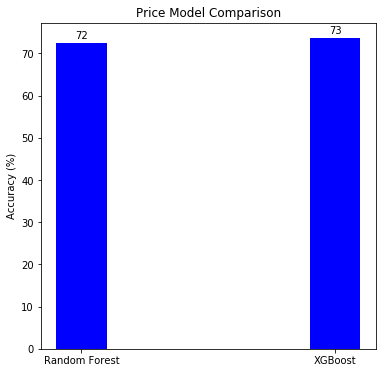

In [70]:
# Plotting the bar graph for accuracy (after applying feature selection)

locs = np.arange(0, 2)

width = 0.2

bars = [test_accuracy_rf*100, test_accuracy_xgb_15*100]
bars_xgb = []

fig, a = plt.subplots(1, 1, figsize=(6, 6))

plot = a.bar(locs, bars, width, color='b')
# xgb_plot = a.bar(locs+width, bars_xgb, width, color='r')

a.set_ylabel('Accuracy (%)')
a.set_title('Price Model Comparison')
a.set_xticks(locs)
a.set_xticklabels(('Random Forest', 'XGBoost'))
# a.legend(plot, ('Random Forest', 'XGBoost'))

def barLabel(models):
    """
    Attach a text label above each bar displaying its height
    """
    for model in models:
        height = model.get_height()
        a.text(model.get_x() + model.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

barLabel(plot)
# barLabel(xgb_plot)

plt.show()

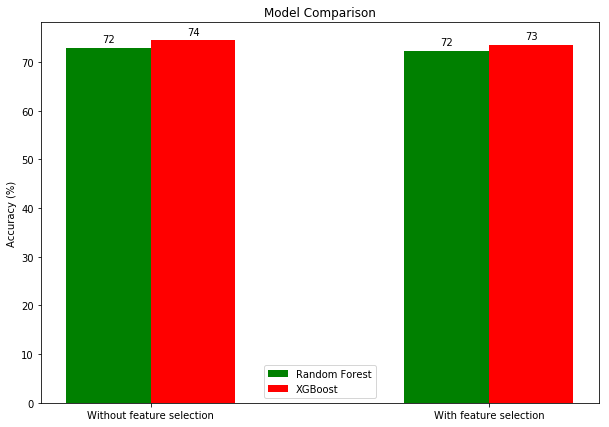

In [71]:
# comparing model accuracies with/without feature selection
locs = np.arange(1, 3)

width = 0.25

bars_rf = [test_accuracy_2*100, test_accuracy_rf*100]
bars_xgb = [test_accuracy_xgb*100, test_accuracy_xgb_15*100]

fig, a = plt.subplots(1, 1, figsize=(10, 7))

rf_plot = a.bar(locs, bars_rf, width, color='g')
xgb_plot = a.bar(locs+width, bars_xgb, width, color='r')

a.set_ylabel('Accuracy (%)')
a.set_title('Model Comparison')
a.set_xticks(locs + width / 2)
a.set_xticklabels(('Without feature selection', 'With feature selection'))
a.legend((rf_plot[0], xgb_plot[0]), ('Random Forest', 'XGBoost'))

def barLabel(models):
    """
    Attach a text label above each bar displaying its height
    """
    for model in models:
        height = model.get_height()
        a.text(model.get_x() + model.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

barLabel(rf_plot)
barLabel(xgb_plot)

plt.show()

### K-Means Clustering

Let us apply a clustering algorithm an see whether our models improve.

<b>Note</b>: We will implement this on the XGBoost model as that is the one that performed better.

In [72]:
train, test = train_test_split(bnb_listings_2, train_size=0.8, test_size=0.2, random_state=42)

train_xgb = train[list(sorted_features.index)]
test_xgb = test[list(sorted_features.index)]

from sklearn.cluster import KMeans
n_clusters = len(np.unique(train_xgb))
# n_clusters = 8
kmeans = KMeans(n_clusters = n_clusters, random_state=0)
kmeans.fit(train_xgb)
labels = kmeans.labels_

train_xgb['clusters'] = labels

kmeans.fit(test_xgb)
labels = kmeans.labels_

test_xgb['clusters'] = labels

# run only if you want 2 categories
target_train_xgb = train['price_segments'] 

target_test_xgb = test['price_segments'] 

xgboost_bnb = XGBClassifier(n_estimators=1000)
xgboost_bnb.fit(train_xgb, target_train_xgb)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [73]:
# calculating accuracy
train_predict = xgboost_bnb.predict(train_xgb)

train_accuracy = accuracy_score(target_train_xgb, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = xgboost_bnb.predict(test_xgb)

test_accuracy = accuracy_score(target_test_xgb, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 78.26239008792966 %
the test accuracy is: 73.45389149765211 %


As can be seen, k-means clustering did not improve the accuracy score.

### K-fold Cross Validation

Let us apply another technique to improve our model accuracy. Now, we will try <b>K-fold Cross Validation</b>.
This technique runs our model for different values of 'k' number of splits. The function described below will return a dictionary of accuracies, which will have each value of 'k' as its key and the list of accuracies for 'k' number of splits.

In [138]:
from sklearn.model_selection import KFold

In [139]:
def kCrossValXGB(dataset, label_name, k):
    """
    The function described below will return a dictionary of accuracies, 
    which will have each value of 'k' as its key and the list of accuracies 
    for 'k' number of splits.
    """
    
#     preparation for the for loops
    accuracies = {}
    target = dataset[label_name]
    
#     outer loop for creating splits
    for f in range(2, k+1):
        CV_splits = KFold(n_splits=f)
        
#         get indices for training and validation datasets
        for indices_train, indices_validate in CV_splits.split(dataset.drop(label_name, axis=1), y=target):
        
#             create training and validation datasets
            train_dataset, validate_dataset = dataset.take(indices_train), dataset.take(indices_validate)
            train, validate = train_dataset.drop(label_name, axis=1), validate_dataset.drop(label_name, axis=1)

#            creating new XGBoost model
            new_xgb = XGBClassifier(n_estimators=1000)
            new_xgb.fit(train, train_dataset[label_name])

            predictions = new_xgb.predict(validate)

#             calculating area under the curve
            new_accuracy = accuracy_score(validate_dataset[label_name], predictions)
#             accuracies.append(new_accuracy)
#                 adding to dictionary
            if f not in accuracies.keys():
                accuracies[f] = [new_accuracy]
            else:
                accuracies[f].append(new_accuracy)

            
    return accuracies

In [140]:
# running the above function
features_to_take = list(sorted_features.index)
features_to_take.append('price_segments')

accuracies = kCrossValXGB(bnb_listings_2[features_to_take], 'price_segments', 10)

In [141]:
# finding maximum accuracy for each value of 'k'
k_values = accuracies.keys()
max_accuracies = []
for k in k_values:
    max_accuracies.append(max(accuracies[k]))
    print('Max accuracy for k = {} :'.format(k), round(np.multiply(max(accuracies[k]), 100), 2), '%')

Max accuracy for k = 2 : 74.2 %
Max accuracy for k = 3 : 74.71 %
Max accuracy for k = 4 : 74.92 %
Max accuracy for k = 5 : 75.3 %
Max accuracy for k = 6 : 75.41 %
Max accuracy for k = 7 : 75.94 %
Max accuracy for k = 8 : 75.56 %
Max accuracy for k = 9 : 76.15 %
Max accuracy for k = 10 : 76.24 %


As per the results, the most improvement we see in the accuracy of our model is when the value of 'k' is equal to 10.

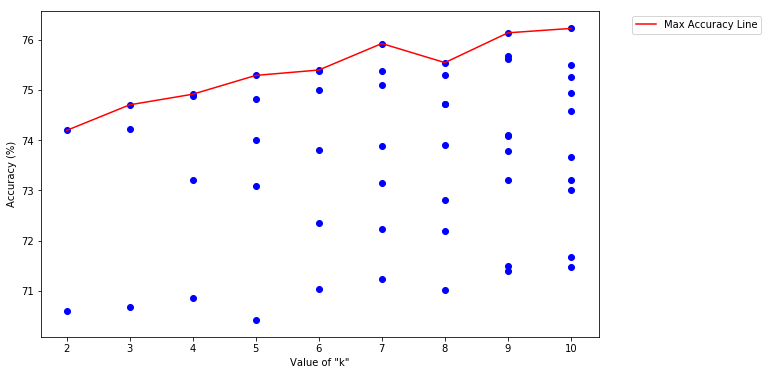

In [142]:
# plotting the accuracy dictionary mentioned above
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.scatter([k for i in range(len(accuracies[k]))], np.multiply(accuracies[k], 100), color='b')
plt.plot(list(accuracies.keys()), np.multiply(max_accuracies, 100), color='r', label='Max Accuracy Line')
plt.legend(bbox_to_anchor=(1, 0, 0.3, 1))
plt.xlabel('Value of "k"')
plt.ylabel('Accuracy (%)')    
plt.show()

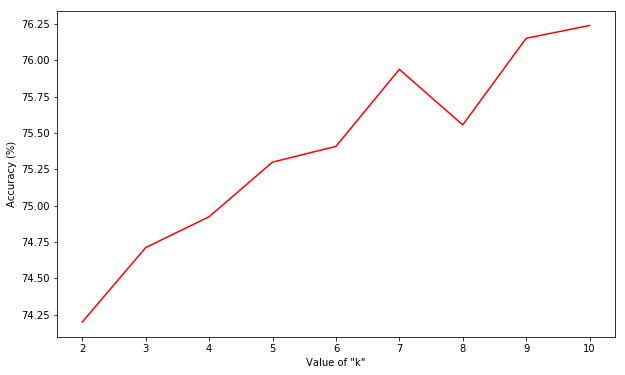

In [143]:
# showing just the maximum accuracies
plt.figure(figsize=(10, 6))
plt.plot(list(accuracies.keys()), np.multiply(max_accuracies, 100), color='r')
plt.xlabel('Value of "k"')
plt.ylabel('Accuracy (%)')
plt.show()

# Rating Prediction

### Random Forest for Getting Feature Importance and also for analysis

In [74]:
# removing Null ratings
bnb_listings_ratings = bnb_listings.dropna(subset=['review_scores_rating'])

In [75]:
bnb_listings_ratings.shape

(38445, 45)

Now we will create categories for ratings.

In [76]:
# median ratings
median_ratings = bnb_listings_ratings["review_scores_rating"].median()
median_ratings


#greater than median it is 1 else 0
bnb_listings_ratings = bnb_listings_ratings.copy()
bnb_listings_ratings['review_scores_rating'] = np.where(bnb_listings_ratings['review_scores_rating']>median_ratings, 1, 0)

In [77]:
bnb_listings_ratings['price'].quantile([0.33, 0.67])

0.33     80.0
0.67    149.0
Name: price, dtype: float64

In [78]:
bnb_listings_ratings.loc[bnb_listings_ratings.price<=80, 'price_segments'] = 1
bnb_listings_ratings.loc[(bnb_listings_ratings.price>80)&(bnb_listings_ratings.price<=150), 'price_segments'] = 2
bnb_listings_ratings.loc[bnb_listings_ratings.price>150, 'price_segments'] = 3

In [79]:
bnb_listings_ratings['price_segments'].unique()

array([1, 2, 3])

In [80]:
bnb_listings_ratings.head(15)

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_segments,date_segments
0,2515,2758,2008.0,0,0.927527,0.0,3.0,3.0,1.0,1.0,...,173,0,0,4,0,0,3,1.42,1,1
1,2539,2787,2008.0,0,0.927527,1.0,8.0,8.0,1.0,1.0,...,8,1,0,2,0,0,8,0.23,2,1
2,2595,2845,2008.0,2,0.800000,0.0,5.0,5.0,1.0,1.0,...,36,0,0,4,1,1,2,0.33,3,1
3,3330,4177,2008.0,0,0.927527,0.0,5.0,5.0,1.0,1.0,...,34,1,0,4,0,0,3,0.32,1,1
5,3831,4869,2008.0,4,1.000000,0.0,1.0,1.0,1.0,1.0,...,213,0,0,2,0,0,1,4.36,2,1
6,5022,7192,2009.0,2,1.000000,0.0,1.0,1.0,1.0,1.0,...,7,0,0,4,1,1,1,0.09,1,1
7,5099,7322,2009.0,2,1.000000,0.0,1.0,1.0,1.0,0.0,...,66,0,0,4,1,1,1,0.57,3,1
8,5121,7356,2009.0,0,0.927527,0.0,1.0,1.0,1.0,0.0,...,51,0,0,4,0,0,1,0.45,1,1
9,5172,7386,2009.0,0,0.927527,1.0,1.0,1.0,1.0,1.0,...,82,0,0,4,0,1,1,0.71,2,1
10,5178,8967,2009.0,2,0.910000,0.0,1.0,1.0,1.0,0.0,...,396,0,0,4,0,0,1,3.46,1,1


In [82]:

train, test = train_test_split(bnb_listings_ratings, test_size = 0.20, random_state=42)

In [83]:
# Split into train and test
train_X = train.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode'
                      , 'country_code', 'host_since'], axis=1)
train_Y = train['review_scores_rating'] 

test_X = test.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode',
                     'country_code', 'host_since'], axis=1)
test_Y = test['review_scores_rating'] 

In [84]:
#Import Library
from sklearn.ensemble import RandomForestClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestClassifier(n_estimators = 1000)
# Train the model using the training sets and check score
model.fit(train_X, train_Y)
#Predict Output
predicted= model.predict(test_X)

In [85]:
# Calculate the absolute errors
errors = abs(predicted - test_Y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.3 degrees.


In [86]:
#This is to check the accuracy of the model

from sklearn.metrics import accuracy_score

# for Train data
train_predict = model.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

# for train data
test_predict = model.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 99.99349720379763 %
the test accuracy is: 69.80101443620757 %


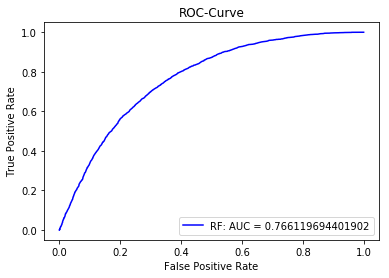

In [87]:
#To plot the ROC-AUC curve of the model

from sklearn.metrics import roc_curve, auc

test_predict = model.predict_proba(test_X)[:,1]

rf_fpr, rf_tpr, threshold = roc_curve(test_Y, test_predict)
rf_auc = auc(rf_fpr, rf_tpr)
plt.title("ROC-Curve")
plt.plot(rf_fpr, rf_tpr, 'b', label='RF: AUC = ' + str(rf_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC for this Random Forest is .76 if we don't do any feature selection.

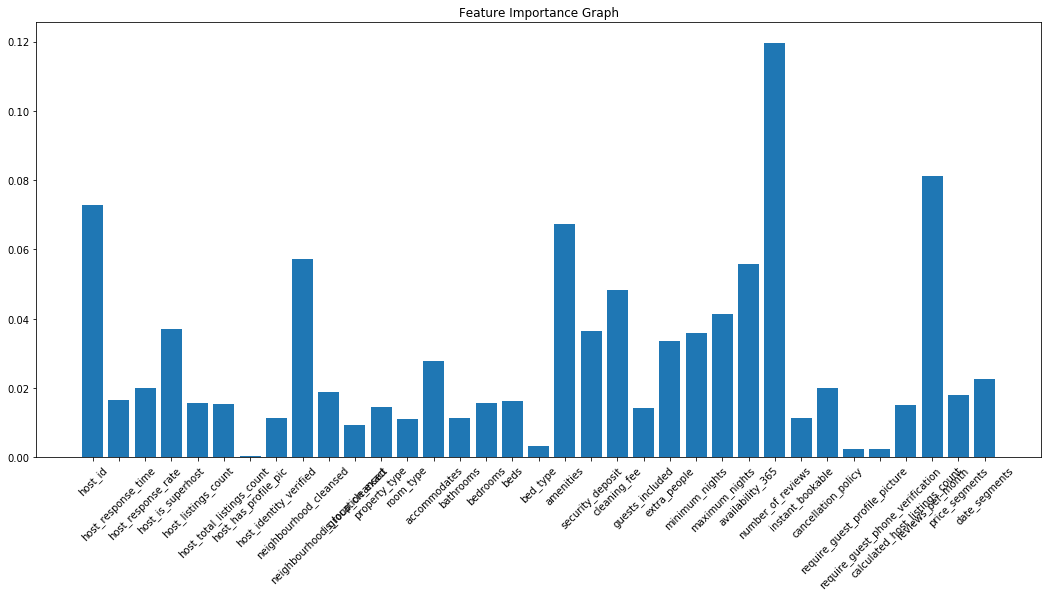

In [88]:
#getting feature importance
feat_imp = model.feature_importances_

#getting a list of columns
feat = list(train_X.columns.values)

plt.figure(figsize=(18, 8))

plt.bar(feat, feat_imp)
# df.letters.value_counts().sort_values().plot(kind = 'barh')

#for good visibility
plt.xticks(feat, rotation=45)
plt.title('Feature Importance Graph')

plt.show()

Text(0, 0.5, 'Feature Importance Score')

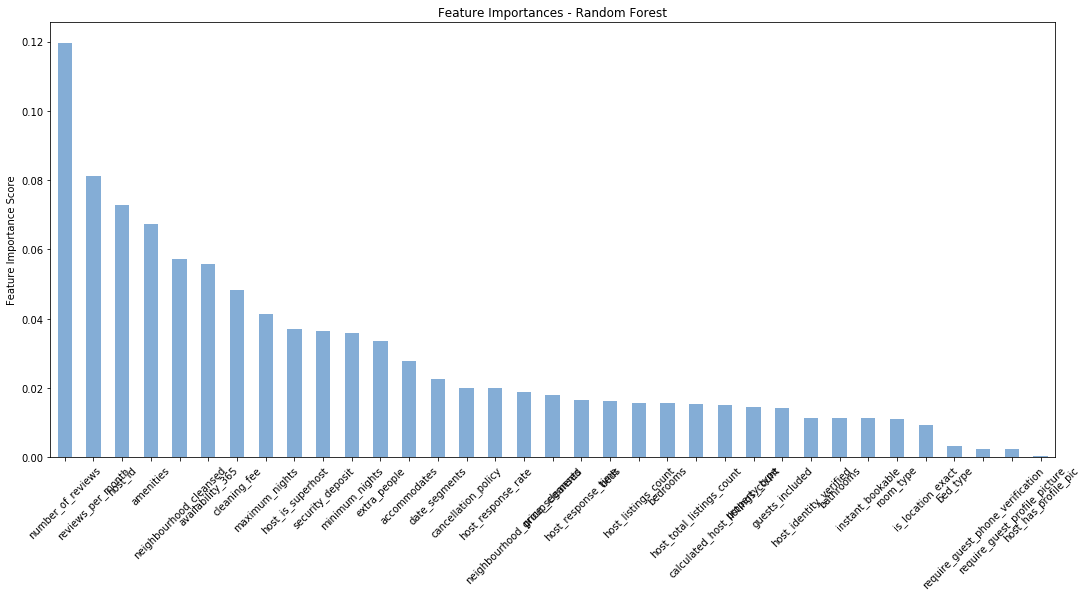

In [89]:
fig, ax = plt.subplots(figsize=(18, 8))
feat_imp = pd.Series(model.feature_importances_, train_X.columns.values).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')

Text(0, 0.5, 'Feature Importance Score')

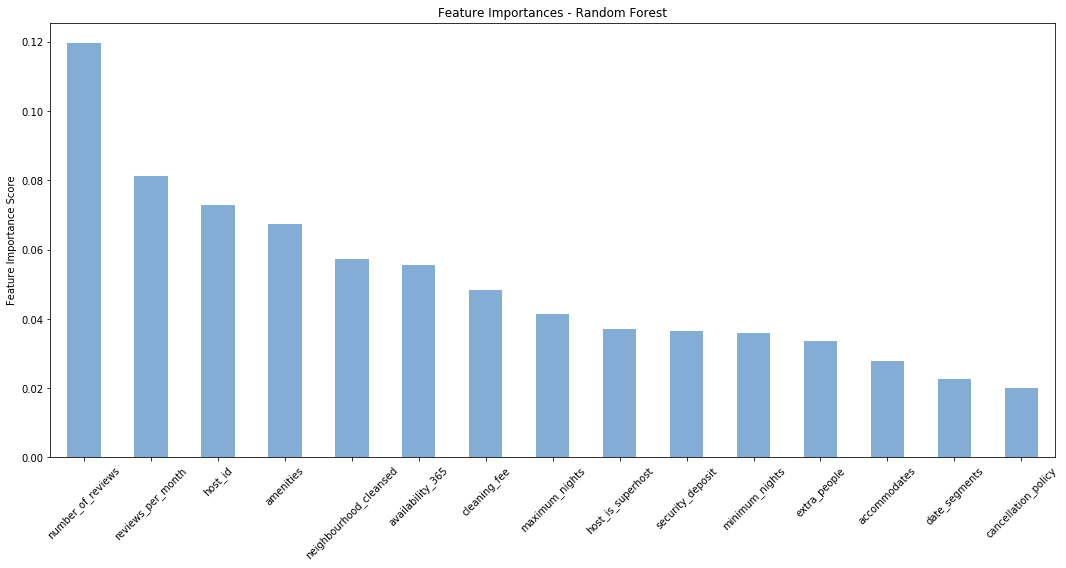

In [90]:
# Feature Importance for top 15 features

fig, ax = plt.subplots(figsize=(18, 8))
feat_imp = pd.Series(model.feature_importances_, train_X.columns.values).sort_values(ascending=False)
feat_imp.head(15).plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')

Getting the top 15 features:

In [91]:
# Viewing top 15 feat imp
feat_imp.head(15)

number_of_reviews         0.119552
reviews_per_month         0.081095
host_id                   0.072987
amenities                 0.067356
neighbourhood_cleansed    0.057158
availability_365          0.055673
cleaning_fee              0.048187
maximum_nights            0.041376
host_is_superhost         0.037126
security_deposit          0.036606
minimum_nights            0.036007
extra_people              0.033620
accommodates              0.027768
date_segments             0.022542
cancellation_policy       0.019939
dtype: float64

'number_of_reviews' and 'reviews_per_month' cannot be used in ratings predictions as it is primarily aimed for new listers and they will not have this information.

In [92]:
## Removing 'number_of_reviews' and 'reviews_per_month'
feat_imp_col_list = feat_imp.index.values[2:17]

In [93]:
list(feat_imp_col_list)

['host_id',
 'amenities',
 'neighbourhood_cleansed',
 'availability_365',
 'cleaning_fee',
 'maximum_nights',
 'host_is_superhost',
 'security_deposit',
 'minimum_nights',
 'extra_people',
 'accommodates',
 'date_segments',
 'cancellation_policy',
 'host_response_rate',
 'neighbourhood_group_cleansed']

Correlation matrix for useful features:

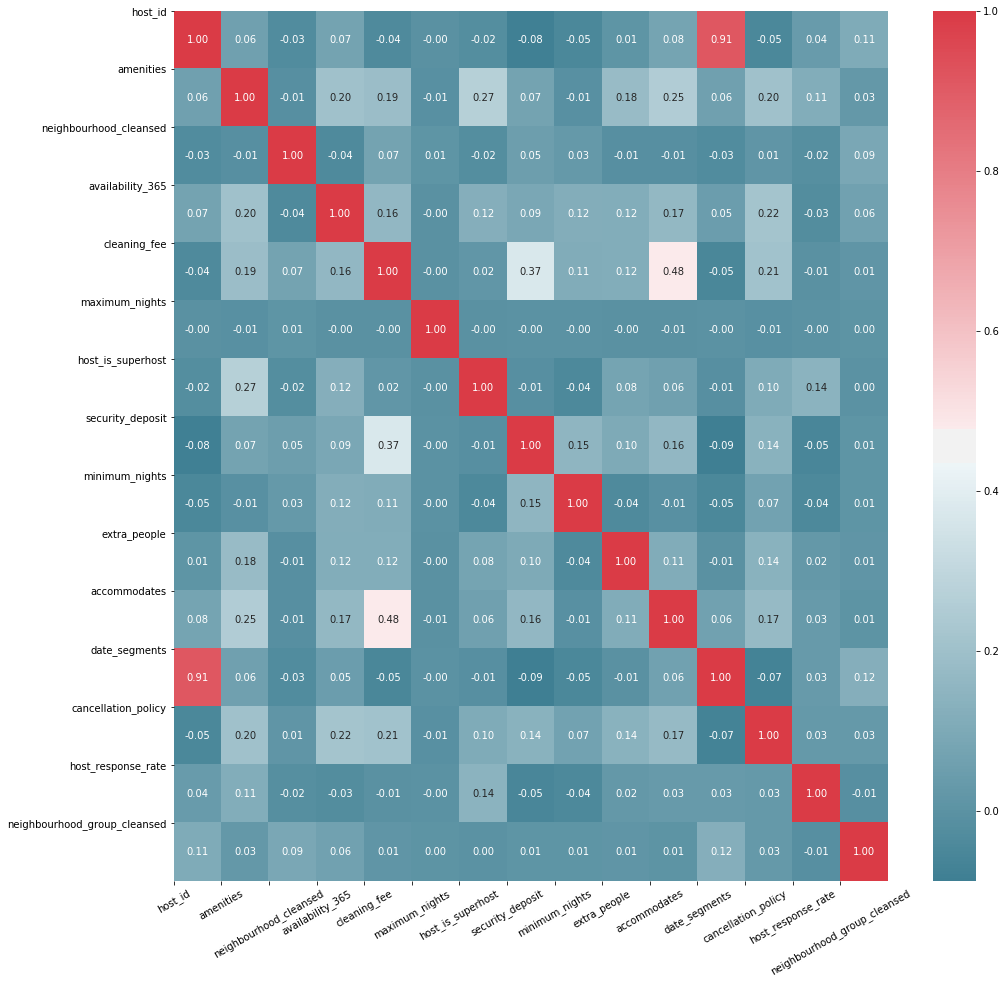

In [94]:
#Correlation matrix for useful features:
import seaborn as sns
#Create Correlation df
corr = bnb_listings_ratings[list(feat_imp_col_list)].corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(16, 16))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=30);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

#### Random Forest with feature selection

In [95]:
## split data into train and test

train_X = train[list(feat_imp_col_list)]
train_Y = train['review_scores_rating'] 

test_X = test[list(feat_imp_col_list)]
test_Y = test['review_scores_rating'] 

In [96]:
#Import Library
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestClassifier(n_estimators = 1000)
# Train the model using the training sets and check score
model.fit(train_X, train_Y)
#Predict Output
predicted= model.predict(test_X)

In [97]:
# Calculate the absolute errors
errors = abs(predicted - test_Y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.37 degrees.


In [98]:
# Checking accuracy of the model
from sklearn.metrics import accuracy_score

# for Train data
train_predict = model.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = model.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 99.9414748341787 %
the test accuracy is: 63.10313434776954 %


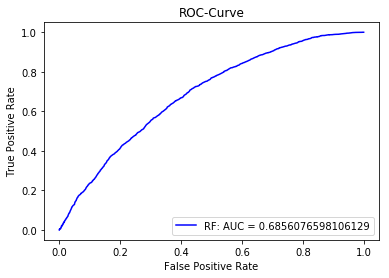

In [99]:
from sklearn.metrics import roc_curve, auc

test_predict = model.predict_proba(test_X)[:,1]

rf_fpr, rf_tpr, threshold = roc_curve(test_Y, test_predict)
rf_auc = auc(rf_fpr, rf_tpr)
plt.title("ROC-Curve")
plt.plot(rf_fpr, rf_tpr, 'b', label='RF: AUC = ' + str(rf_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC of Random Forest after keeping only the useful features is reduced to 0.685. The main reason for this is due to the removal of the top 2 features namely 'number_of_reviews' and 'reviews_per_month' from the list of preditor variables.

### Logistic Regression

#### LR Without feature importance

In [100]:
#Taking the ueful features in the train and test split respective

train_X = train.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode'
                      , 'country_code', 'host_since'], axis=1)
train_Y = train['review_scores_rating'] 

test_X = test.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode',
                     'country_code', 'host_since'], axis=1)
test_Y = test['review_scores_rating'] 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# Logisitic regression
log_reg = LogisticRegression(C=1e30)
log_reg.fit(train_X, train_Y)
predictions_LR = log_reg.decision_function(test_X)

In [102]:
# Calculate the absolute errors
errors = abs(predictions_LR - test_Y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.54 degrees.


In [103]:
from sklearn.metrics import accuracy_score

# for Train data
train_predict = log_reg.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = log_reg.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 53.52451554168292 %
the test accuracy is: 53.583040707504225 %


In [104]:
predictions_LR = log_reg.predict_proba(test_X)[:,1]
log_reg_fpr, log_reg_tpr, threshold = roc_curve(test_Y, predictions_LR)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

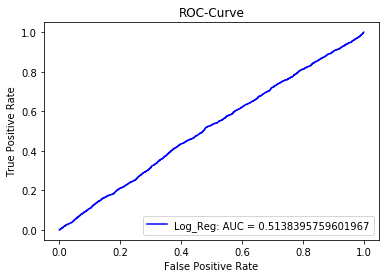

In [105]:
plt.title("ROC-Curve")
plt.plot(log_reg_fpr, log_reg_tpr, 'b', label='Log_Reg: AUC = ' + str(log_reg_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression With Feature importance

In [106]:
# run only if you want 2 categories
train_X = train[list(feat_imp_col_list)]
train_Y = train['review_scores_rating'] 

test_X = test[list(feat_imp_col_list)]
test_Y = test['review_scores_rating'] 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# Logisitic regression
log_reg = LogisticRegression(C=1e30)
log_reg.fit(train_X, train_Y)
predictions_LR = log_reg.decision_function(test_X)

In [108]:
# Calculate the absolute errors
errors = abs(predictions_LR - test_Y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.54 degrees.


In [109]:
from sklearn.metrics import accuracy_score

# for Train data
train_predict = log_reg.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = log_reg.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 53.52451554168292 %
the test accuracy is: 53.583040707504225 %


In [110]:
## ROC-AUC Curve
predictions_LR = log_reg.predict_proba(test_X)[:,1]
log_reg_fpr, log_reg_tpr, threshold = roc_curve(test_Y, predictions_LR)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

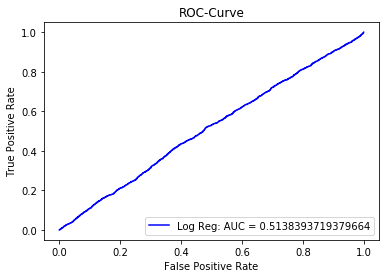

In [111]:
plt.title("ROC-Curve")
plt.plot(log_reg_fpr, log_reg_tpr, 'b', label='Log Reg: AUC = ' + str(log_reg_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy not that great. Just 0.51 so wont be taking this.

### XGBoost

#### XGBoost without feature selection

In [112]:
#importing the XGBoost library
from xgboost import XGBClassifier

In [113]:
# getting imprtant features in train and test
train_X = train.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode'
                      , 'country_code', 'host_since'], axis=1)
train_Y = train['review_scores_rating'] 

test_X = test.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode',
                     'country_code', 'host_since'], axis=1)
test_Y = test['review_scores_rating'] 

In [114]:
xgboost_bnb = XGBClassifier(n_estimators=1000)
xgboost_bnb.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [115]:
predictions_xgb = xgboost_bnb.predict(test_X)

In [116]:
errors_xgb = abs(predictions_xgb - test_Y)
print('Mean Absolute Error:', round(np.mean(errors_xgb), 2), 'degrees.')

Mean Absolute Error: 0.29 degrees.


In [117]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score

# for Train data
train_predict = xgboost_bnb.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = xgboost_bnb.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 75.37716217973728 %
the test accuracy is: 70.81545064377683 %


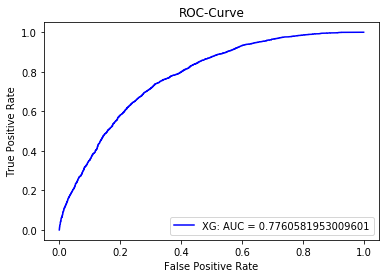

In [118]:
# AUC-ROC curve
from sklearn.metrics import roc_curve, auc

test_predict = xgboost_bnb.predict_proba(test_X)[:,1]

xg_fpr, xg_tpr, threshold = roc_curve(test_Y, test_predict)
xg_auc = auc(xg_fpr, xg_tpr)
plt.title("ROC-Curve")
plt.plot(xg_fpr, xg_tpr, 'b', label='XG: AUC = ' + str(xg_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC for XGBoost without any feature selection by using all the features is: 0.78 which is a very good performace overall

#### XGB with feature selection

In [119]:
# Taking feature
train_X = train[list(feat_imp_col_list)]
train_Y = train['review_scores_rating'] 

test_X = test[list(feat_imp_col_list)]
test_Y = test['review_scores_rating'] 

In [120]:
# training the model
xgboost_bnb = XGBClassifier(n_estimators=1000)
xgboost_bnb.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [121]:
# Making prediction
predictions_xgb = xgboost_bnb.predict(test_X)

In [122]:
errors_xgb = abs(predictions_xgb - test_Y)
print('Mean Absolute Error:', round(np.mean(errors_xgb), 2), 'degrees.')

Mean Absolute Error: 0.36 degrees.


In [123]:
# Accuracy for the model
from sklearn.metrics import accuracy_score

# for Train data
train_predict = xgboost_bnb.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = xgboost_bnb.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 69.5766679672259 %
the test accuracy is: 63.74040837560151 %


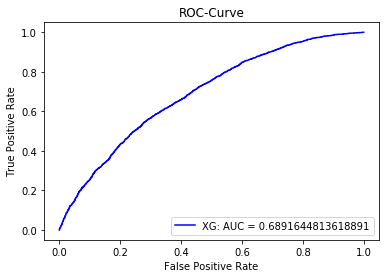

In [124]:
# ROC-AUC Curve for the model
from sklearn.metrics import roc_curve, auc

test_predict = xgboost_bnb.predict_proba(test_X)[:,1]

xg_fpr, xg_tpr, threshold = roc_curve(test_Y, test_predict)
xg_auc = auc(xg_fpr, xg_tpr)
plt.title("ROC-Curve")
plt.plot(xg_fpr, xg_tpr, 'b', label='XG: AUC = ' + str(xg_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC for XGBoost without any feature selection by using all the features is: 0.689. The main reason for this drop in AUC value from the model without feature importance is due to the removal of the top 2 features namely 'number_of_reviews' and 'reviews_per_month' from the list of preditor variables.

### AUC combined

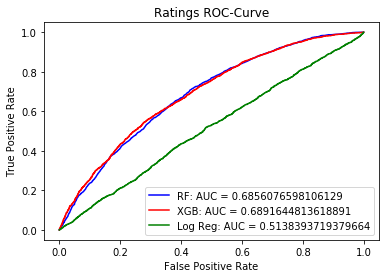

In [125]:
from sklearn.metrics import roc_curve, auc

test_predict_xg = xgboost_bnb.predict_proba(test_X)[:,1]
test_predict_rf = model.predict_proba(test_X)[:,1]
test_predict_lr = log_reg.predict_proba(test_X)[:,1]


rf_fpr, rf_tpr, threshold = roc_curve(test_Y, test_predict_rf)
rf_auc = auc(rf_fpr, rf_tpr)

xg_fpr, xg_tpr, threshold = roc_curve(test_Y, test_predict_xg)
xg_auc = auc(xg_fpr, xg_tpr)

log_reg_fpr, log_reg_tpr, threshold = roc_curve(test_Y, test_predict_lr)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

plt.title("Ratings ROC-Curve")
plt.plot(rf_fpr, rf_tpr, 'b', label='RF: AUC = ' + str(rf_auc))
plt.plot(xg_fpr, xg_tpr, 'r', label='XGB: AUC = ' + str(xg_auc))
plt.plot(log_reg_fpr, log_reg_tpr, 'g', label='Log Reg: AUC = ' + str(log_reg_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XGBoost is the best performing model and we will select this for our analysis.

### K-means clustering

In [126]:
# Train test split
train_imp = train[list(feat_imp_col_list)]
test_imp = test[list(feat_imp_col_list)]

In [127]:
# kmeans clustering for train
from sklearn.cluster import KMeans
# n_clusters = len(np.unique(train_imp))
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state=0)
kmeans.fit(train_imp)
labels = kmeans.labels_

In [128]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [129]:
train_imp['clusters'] = labels

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
# kmeans clustering for test
from sklearn.cluster import KMeans
n_clusters = len(np.unique(train_imp))
n_clusters = 4
# kmeans = KMeans(n_clusters = n_clusters, random_state=0)
kmeans.fit(test_imp)
labels = kmeans.labels_

In [131]:
labels

array([0, 2, 1, ..., 1, 2, 3], dtype=int32)

In [132]:
test_imp['clusters'] = labels

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
train_X = train_imp
train_Y = train['review_scores_rating'] 

test_X = test_imp
test_Y = test['review_scores_rating'] 

In [134]:
xgboost_bnb = XGBClassifier(n_estimators=1000)
xgboost_bnb.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [135]:
predictions_xgb = xgboost_bnb.predict(test_X)

In [136]:
# Checking accuracy of the model
from sklearn.metrics import accuracy_score

# for Train data
train_predict = xgboost_bnb.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = xgboost_bnb.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 69.70997528937443 %
the test accuracy is: 63.45428534269736 %


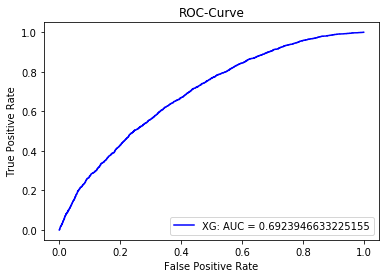

In [137]:
# ROC AUC curve for the model
from sklearn.metrics import roc_curve, auc

test_predict = xgboost_bnb.predict_proba(test_X)[:,1]

xg_fpr, xg_tpr, threshold = roc_curve(test_Y, test_predict)
xg_auc = auc(xg_fpr, xg_tpr)
plt.title("ROC-Curve")
plt.plot(xg_fpr, xg_tpr, 'b', label='XG: AUC = ' + str(xg_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

There is negligible improvement in the performance when we perform a K-means clustering algorithm to create a new column for clusters and then train the XGBoost model.

## K-Fold cross validation

In [144]:
# performing K-Fold Cross validation 
from sklearn.model_selection import KFold
def kCrossValXGB(dataset, label_name, k):
    
#     preparation for the for loops
    auc_curve = {}
    target = dataset[label_name]
    
#     outer loop for creating splits
    for f in range(2, k+1):
        CV_splits = KFold(n_splits=f)
        
#         get indices for training and validation datasets
        for indices_train, indices_validate in CV_splits.split(dataset.drop(label_name, axis=1), y=target):
        
#             create training and validation datasets
            train_dataset, validate_dataset = dataset.take(indices_train), dataset.take(indices_validate)
            train, validate = train_dataset.drop(label_name, axis=1), validate_dataset.drop(label_name, axis=1)

#            creating new XGBoost model
            new_xgb = XGBClassifier(n_estimators=1000)
            new_xgb.fit(train, train_dataset[label_name])

            predictions = new_xgb.predict_proba(validate)[:,1]

#             calculating area under the curve
            xg_fpr, xg_tpr, threshold = roc_curve(validate_dataset[label_name], predictions)
            xg_auc = auc(xg_fpr, xg_tpr)

#                 adding to dictionary
            if f not in auc_curve.keys():
                auc_curve[f] = [xg_auc]
            else:
                auc_curve[f].append(xg_auc)

            
    return auc_curve

In [145]:
features_to_take = list(feat_imp_col_list)
features_to_take.append('review_scores_rating')

AUC_val = kCrossValXGB(bnb_listings_ratings[features_to_take], 'review_scores_rating', 10)

In [146]:
k_values = AUC_val.keys()
max_AUC = []
for k in k_values:
    max_AUC.append(max(AUC_val[k]))
    print('Max AUC for k = {} :'.format(k), max(AUC_val[k]))

Max AUC for k = 2 : 0.6570208804352757
Max AUC for k = 3 : 0.680955640050573
Max AUC for k = 4 : 0.6972840976379798
Max AUC for k = 5 : 0.6929913083141377
Max AUC for k = 6 : 0.7101920579997991
Max AUC for k = 7 : 0.7084338204282793
Max AUC for k = 8 : 0.7173728049490942
Max AUC for k = 9 : 0.7147247930200645
Max AUC for k = 10 : 0.724448919272137


As per the results, the most improvement we see in the best performance of our model is when the value of 'k' is equal to 10.

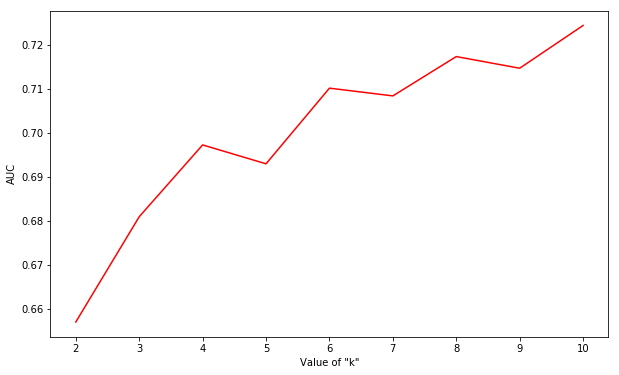

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(list(AUC_val.keys()), max_AUC, color='r')
plt.xlabel('Value of "k"')
plt.ylabel('AUC')
plt.show()

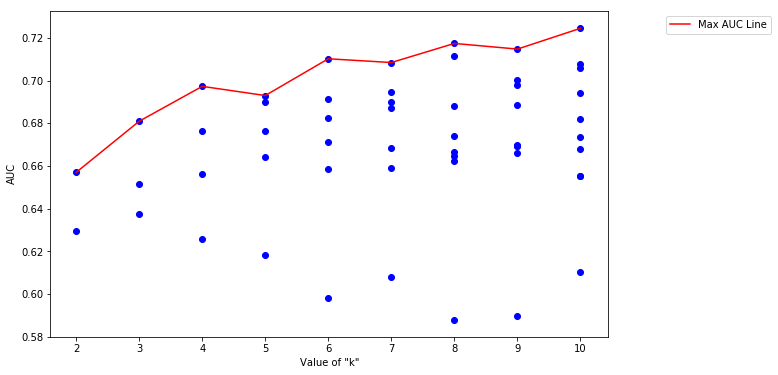

In [148]:
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.scatter([k for i in range(len(AUC_val[k]))], AUC_val[k], color='b')
plt.plot(list(AUC_val.keys()), max_AUC, color='r', label='Max AUC Line')
plt.legend(bbox_to_anchor=(1, 0, 0.3, 1))
plt.xlabel('Value of "k"')
plt.ylabel('AUC')    
plt.show()

# Thank you!